Primeras filas del dataset:
   Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  

Nombres de las columnas:
 ['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']


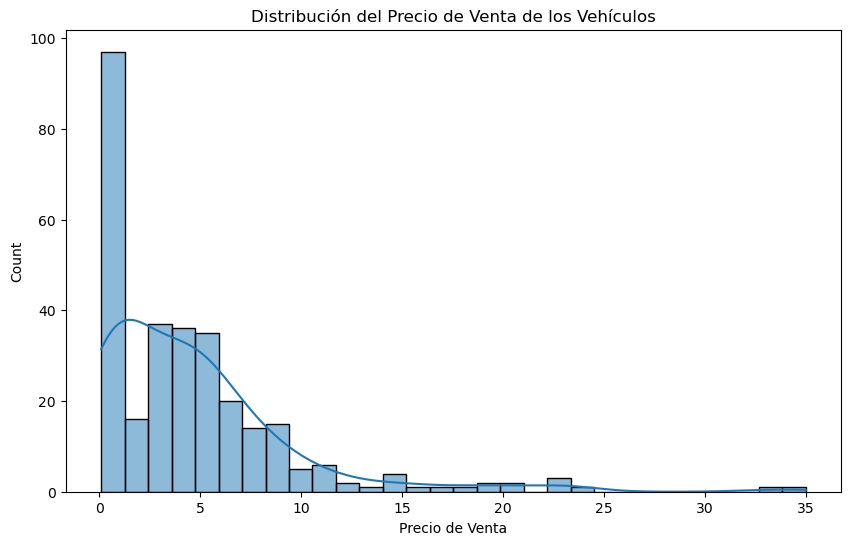

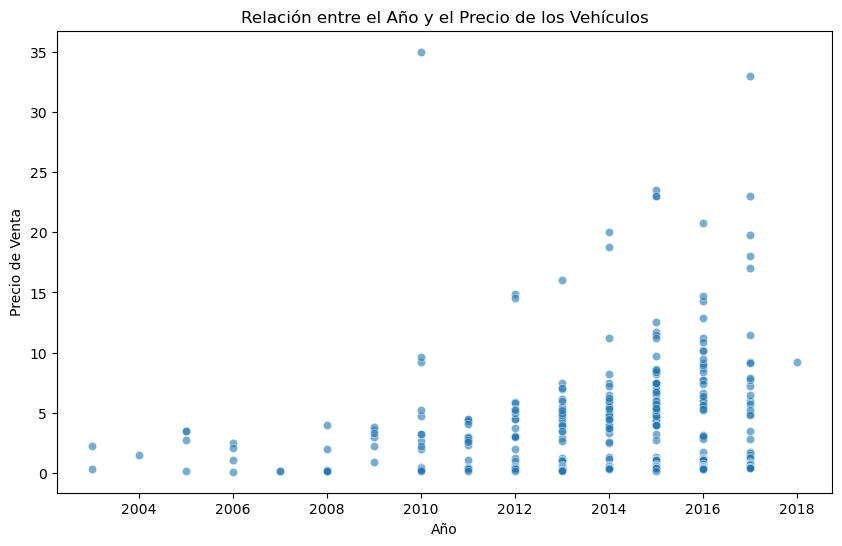

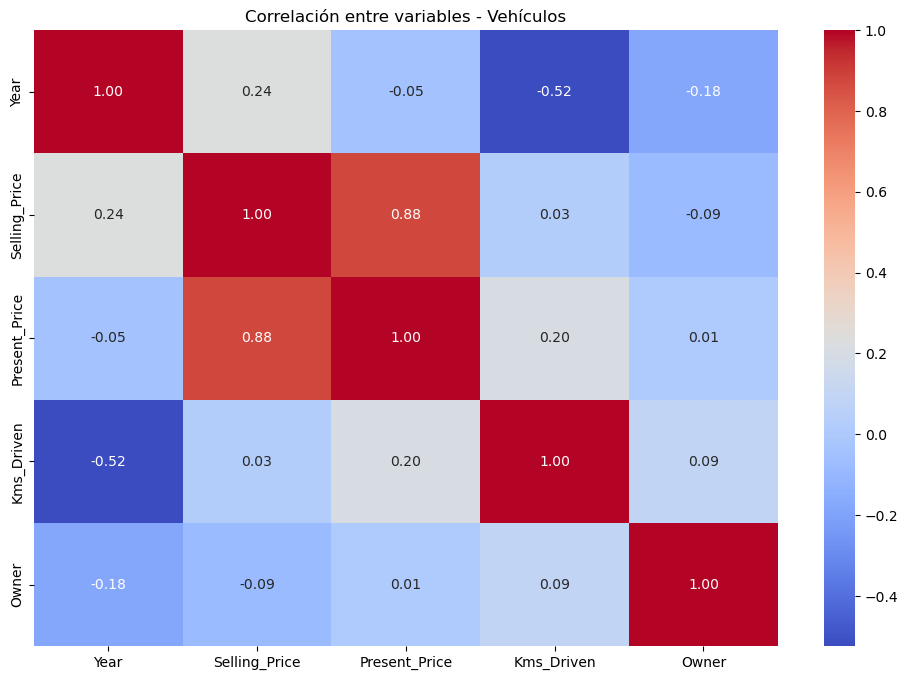

In [1]:
# Paso 1: Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Paso 2: Cargar el dataset
vehicle_df = pd.read_csv('C:/Users/Admin/OneDrive/Documents/Dataset/car data.csv')

# Paso 3: Revisar las primeras filas y las columnas
print("Primeras filas del dataset:\n", vehicle_df.head())
print("\nNombres de las columnas:\n", vehicle_df.columns.tolist())

# Paso 4: Visualizar la distribución del precio
plt.figure(figsize=(10, 6))
sns.histplot(vehicle_df['Selling_Price'], bins=30, kde=True)
plt.title('Distribución del Precio de Venta de los Vehículos')
plt.xlabel('Precio de Venta')
plt.show()

# Paso 5: Relación entre el Año y el Precio de los Vehículos
year_column = 'Year'
price_column = 'Selling_Price'

if year_column in vehicle_df.columns and price_column in vehicle_df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=vehicle_df, x=year_column, y=price_column, alpha=0.6)
    plt.title('Relación entre el Año y el Precio de los Vehículos')
    plt.xlabel('Año')
    plt.ylabel('Precio de Venta')
    plt.show()

# Paso 6: Filtrar solo las columnas numéricas
numeric_df = vehicle_df.select_dtypes(include=[np.number])

# Paso 7: Correlación entre variables numéricas
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre variables - Vehículos')
plt.show()


In [20]:
# Consultar los datos del dataset
print("Valores faltantes por columna:\n", vehicle_df.isnull().sum())
print("\nNúmero de filas duplicadas:", vehicle_df.duplicated().sum())
print("\nTipos de datos del dataset:\n", vehicle_df.dtypes)


Valores faltantes por columna:
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Número de filas duplicadas: 0

Tipos de datos del dataset:
 Car_Name          object
Year               int32
Selling_Price    float64
Present_Price    float64
Kms_Driven       float64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object


In [23]:
# Paso 2: Identificar datos a limpiar
# Revisar valores únicos en columnas categóricas
print("Valores únicos en 'Fuel_Type':", vehicle_df['Fuel_Type'].unique())
print("Valores únicos en 'Seller_Type':", vehicle_df['Seller_Type'].unique())
print("Valores únicos en 'Transmission':", vehicle_df['Transmission'].unique())

# Revisar estadísticas descriptivas de las columnas numéricas
print("Estadísticas descriptivas del dataset:\n", vehicle_df.describe())

# Convertir columnas categóricas en variables numéricas
vehicle_df['Fuel_Type'] = vehicle_df['Fuel_Type'].map({'Petrol': 0, 'Diesel': 1, 'CNG': 2})
vehicle_df['Seller_Type'] = vehicle_df['Seller_Type'].map({'Dealer': 0, 'Individual': 1})
vehicle_df['Transmission'] = vehicle_df['Transmission'].map({'Manual': 0, 'Automatic': 1})

# Verificar los cambios
print("Dataset después del preprocesamiento:\n", vehicle_df.head())


Valores únicos en 'Fuel_Type': ['Petrol' 'Diesel' 'CNG']
Valores únicos en 'Seller_Type': ['Dealer' 'Individual']
Valores únicos en 'Transmission': ['Manual' 'Automatic']
Estadísticas descriptivas del dataset:
               Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   299.000000     299.000000     299.000000     299.000000  299.000000
mean   2013.615385       4.589632       7.541037   36916.752508    0.043478
std       2.896868       4.984240       8.567887   39015.170352    0.248720
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.850000       1.200000   15000.000000    0.000000
50%    2014.000000       3.510000       6.100000   32000.000000    0.000000
75%    2016.000000       6.000000       9.840000   48883.500000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000
Dataset después del preprocesamiento:
   Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Fuel_T

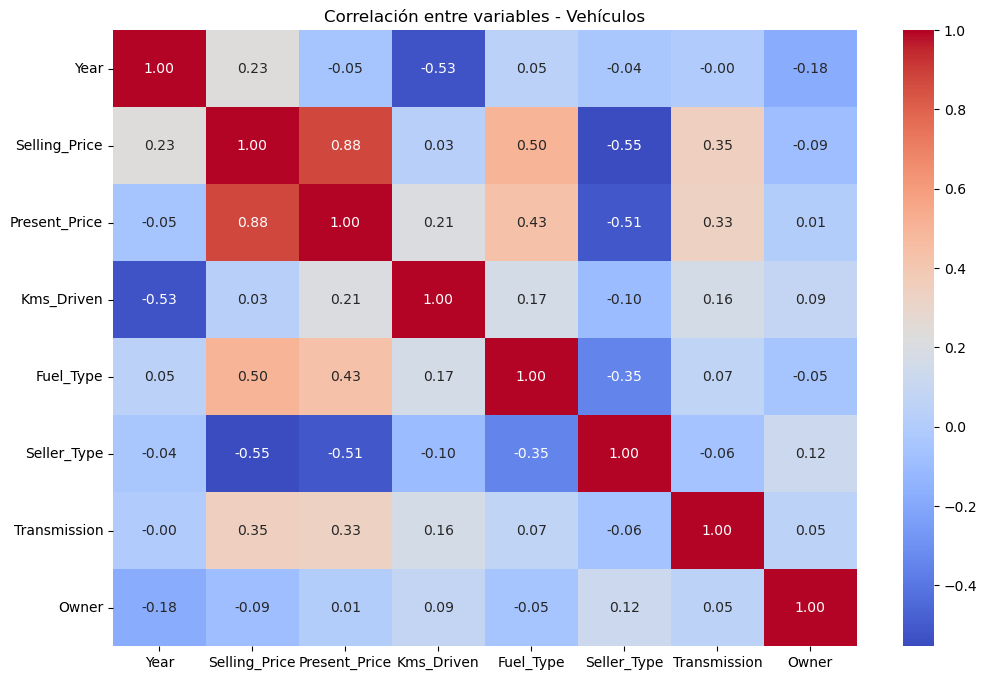

Características relevantes para el modelo: ['Selling_Price', 'Present_Price', 'Fuel_Type', 'Seller_Type']


In [39]:
# Paso 3: Seleccionar las características más relevantes para entrenar el modelo
# Calcular la correlación entre las variables numéricas
numeric_df = vehicle_df.select_dtypes(include=[np.number])  # Filtrar solo columnas numéricas
# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre variables - Vehículos')
plt.show()

# Seleccionar las características más relevantes para el modelo
# Usar un umbral de correlación para filtrar las características
threshold = 0.5
relevant_features = correlation_matrix[abs(correlation_matrix['Selling_Price']) > threshold].index.tolist()

print("Características relevantes para el modelo:", relevant_features)

In [29]:
# Paso 4: Dividir el dataset en Train y Test
from sklearn.model_selection import train_test_split

# Definir las características (X) y la variable objetivo (y)
X = vehicle_df.drop(columns=['Selling_Price', 'Car_Name'])
y = vehicle_df['Selling_Price']

# Dividir el dataset en Train y Test (80% para entrenamiento y 20% para prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos
print("Dimensiones del conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape, y_test.shape)


Dimensiones del conjunto de entrenamiento: (239, 7) (239,)
Dimensiones del conjunto de prueba: (60, 7) (60,)


In [31]:
# Paso 5: Entrenar el modelo
from sklearn.linear_model import LinearRegression

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con el conjunto de entrenamiento
model.fit(X_train, y_train)

# Verificar los coeficientes del modelo
print("Coeficientes del modelo:", model.coef_)
print("Intercepción del modelo:", model.intercept_)


Coeficientes del modelo: [ 3.43074772e-01  4.41316148e-01 -9.36690136e-06  1.22384843e+00
 -1.28967592e+00  1.57661832e+00  7.00680277e-01]
Intercepción del modelo: -689.2203475019093


In [33]:
# Paso 6: Evaluar el desempeño del modelo
from sklearn.metrics import mean_squared_error, r2_score

# Predecir los precios de venta en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE) y R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'R²: {r2}')


Error Cuadrático Medio (MSE): 6.6731374468314755
R²: 0.7410829335730049


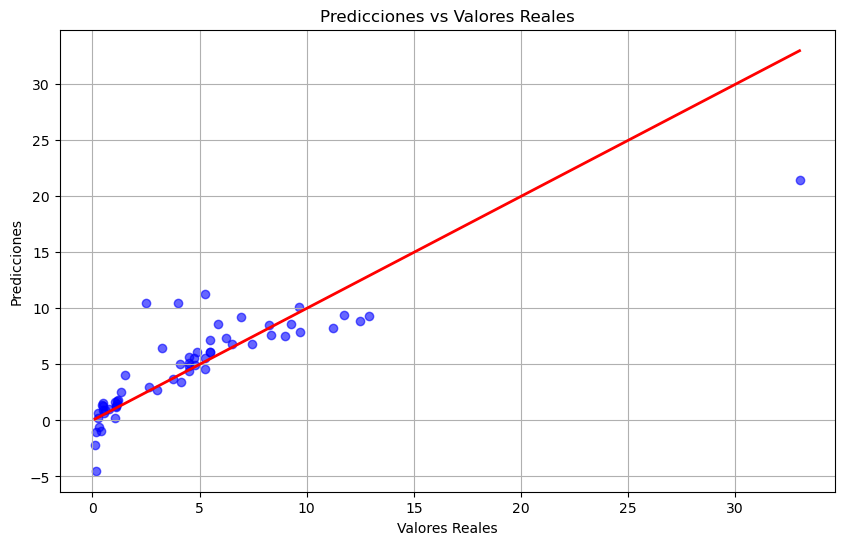

In [35]:
# Paso 7: Visualizar los resultados del modelo
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Línea de referencia
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid(True)
plt.show()
